# Predicting the Price of Houses using Machine Learning

This notebook predicts the price of houses using historical data using regression.  The data and objectives are from a past Kaggle competition, see https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

## 1. Problem definition

> Predict the future sale price of a house, given its characteristics and previous examples of the price of similar houses that have been sold.

## 2. Data

The data is downloaded from the Kaggle House Prices competition: 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

There are 2 main datasets:

* Train.csv is the training set.
* Test. csv is the test set.

## 3. Evaluation

The evaluation metric for this competition is the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

For more on the evaulation of this project check:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation


## 4. Features

Kaggle provides a data dictionay detailing all of the features of the dataset:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [36]:
# Import training set
train = pd.read_csv("data/train.csv", 
                low_memory=False)

In [37]:
# Import test set
test = pd.read_csv("data/test.csv", 
                low_memory=False)

In [38]:
df = pd.concat([train.assign(source="train"), test.assign(source="test")])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [40]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
source              0
Length: 82, dtype: int64

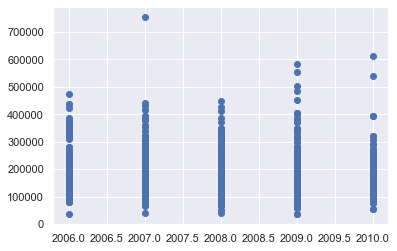

In [41]:
fig, ax = plt.subplots()
ax.scatter(df["YrSold"][:1000], df["SalePrice"][:1000])

In [42]:
df.ExterQual

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1454    TA
1455    TA
1456    TA
1457    TA
1458    TA
Name: ExterQual, Length: 2919, dtype: object

In [43]:
df.ExterQual.dtype

dtype('O')

<AxesSubplot:ylabel='Frequency'>

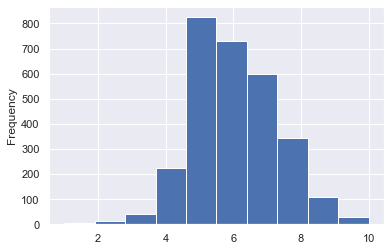

In [44]:
df.OverallQual.plot.hist()

In [45]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [46]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal
SalePrice,208500,181500,223500,140000,250000


In [47]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


C:\Users\tyler\Documents\Machine-Learning\house-prices-regression\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(10.0, 14.0, 0.0, 180.0)

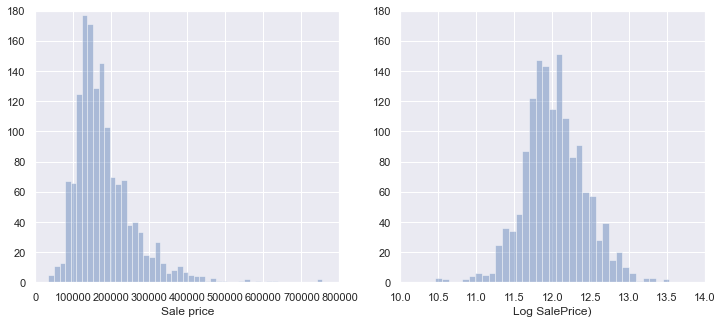

In [48]:
# Plot SalePrice and log of SalePrice
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['SalePrice'],kde=False)
plt.xlabel('Sale price')
plt.axis([0,800000,0,180])
plt.subplot(122)
sns.distplot(np.log(df['SalePrice']),kde=False)
plt.xlabel('Log SalePrice)')
plt.axis([10,14,0,180])

<AxesSubplot:>

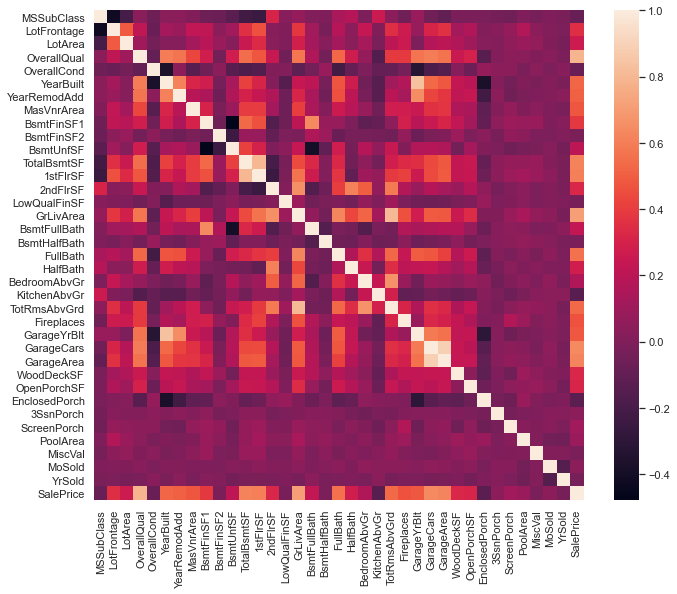

In [49]:
fig, ax = plt.subplots(figsize=(11, 9))
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [50]:
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

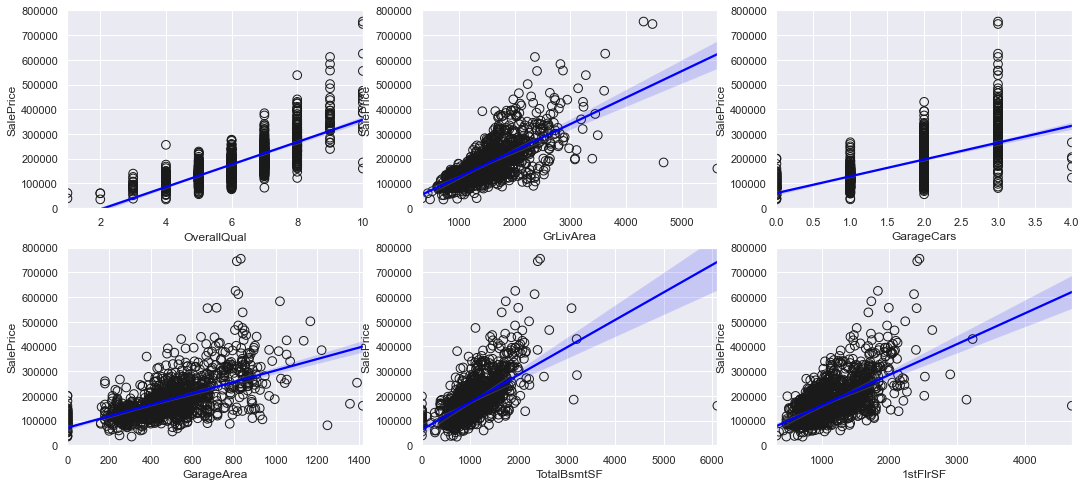

In [53]:
plt.figure(figsize=(18,8))
for i in range(6):
    ii = '23'+str(i+1)
    plt.subplot(int(ii))
    feature = corr_list.index.values[i]
    plt.scatter(df[feature], df['SalePrice'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = feature, y = 'SalePrice', data = df,scatter=False, color = 'Blue')
    ax=plt.gca() 
    ax.set_ylim([0,800000])

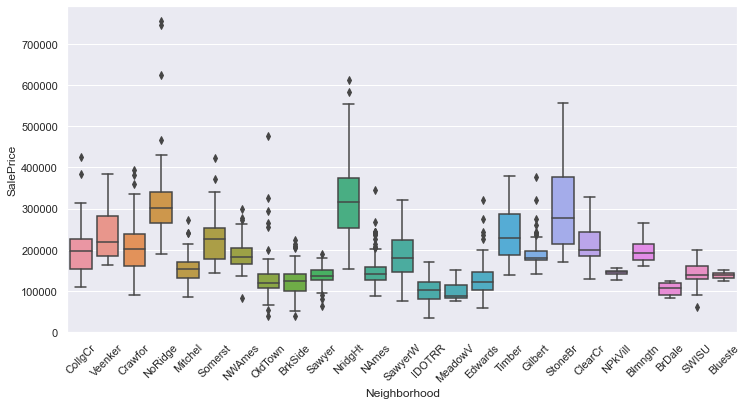

In [54]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

### Make a copy of the original DataFrame

In [55]:
# Make a copy
df_tmp = df.copy()

In [56]:
df_tmp.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal
SalePrice,208500,181500,223500,140000,250000


In [57]:
# Check the values of different columns
df_tmp.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

## 5. Modelling

In [58]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [59]:
df_tmp["SaleCondition"].dtype

dtype('O')

In [60]:
df_tmp.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
source              0
Length: 82, dtype: int64

In [61]:
# converting type of columns to 'category'
df_tmp['ExterQual'] = df_tmp['ExterQual'].astype('category')
# Assigning numerical values and storing in another column
df_tmp['ExterQual_Cat'] = df_tmp['ExterQual'].cat.codes
df_tmp.T

,0,1,2,3,4,5,6,7,8,9,...,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458
Id,1,2,3,4,5,6,7,8,9,10,...,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,180,160,20,160,160,160,160,20,85,60
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RM,RM,RL,RM,RM,RM,RM,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,...,21,21,80,21,21,21,21,160,62,74
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,1470,1484,13384,1533,1526,1936,1894,20000,10441,9627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Normal,Normal,Abnorml,Normal,Normal,Abnorml,Abnorml,Normal,Normal
SalePrice,208500,181500,223500,140000,250000,143000,307000,200000,129900,118000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,train,train,train,train,train,train,train,train,train,train,...,test,test,test,test,test,test,test,test,test,test


In [62]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
onehotencoder = OneHotEncoder()
enc = OneHotEncoder(handle_unknown='ignore')
# passing ExterQual column (label encoded values of causes)
enc_df = pd.DataFrame(enc.fit_transform(df_tmp[['ExterQual']]).toarray(), index=df_tmp.index)
enc_df

,0,1,2,3
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1454,0.0,0.0,0.0,1.0
1455,0.0,0.0,0.0,1.0
1456,0.0,0.0,0.0,1.0
1457,0.0,0.0,0.0,1.0


In [63]:
df_tmp.ExterQual.cat.categories

Index(['Ex', 'Fa', 'Gd', 'TA'], dtype='object')

In [64]:
df_tmp.ExterQual.cat.codes

0       2
1       3
2       2
3       3
4       2
       ..
1454    3
1455    3
1456    3
1457    3
1458    3
Length: 2919, dtype: int8

In [65]:
# Starting count at 0 since we increment the index by 0 in a later step
# Panads standard behavior is to start at -1 when turning categoies into numbers
ExterQual_Categories = dict(enumerate(df_tmp.ExterQual.cat.categories, start=0))
ExterQual_Categories

{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'TA'}

In [66]:
enc_df.columns = enc_df.columns.to_series().map(ExterQual_Categories)
enc_df

,Ex,Fa,Gd,TA
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1454,0.0,0.0,0.0,1.0
1455,0.0,0.0,0.0,1.0
1456,0.0,0.0,0.0,1.0
1457,0.0,0.0,0.0,1.0


In [67]:
df_tmp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,ExterQual_Cat
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500.0,train,2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500.0,train,3
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500.0,train,2
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train,3
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000.0,train,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,6,2006,WD,Normal,NaN,test,3
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2006,WD,Abnorml,NaN,test,3
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,9,2006,WD,Abnorml,NaN,test,3
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,Shed,700,7,2006,WD,Normal,NaN,test,3


In [68]:
# merge with main df on key values
#df_tmp = df_tmp.join(enc_df)
df_tmp = pd.concat([df_tmp,enc_df], axis=1)
df_tmp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,source,ExterQual_Cat,Ex,Fa,Gd,TA
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,208500.0,train,2,0.0,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,181500.0,train,3,0.0,0.0,0.0,1.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,223500.0,train,2,0.0,0.0,1.0,0.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000.0,train,3,0.0,0.0,0.0,1.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,250000.0,train,2,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,2006,WD,Normal,NaN,test,3,0.0,0.0,0.0,1.0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,2006,WD,Abnorml,NaN,test,3,0.0,0.0,0.0,1.0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,2006,WD,Abnorml,NaN,test,3,0.0,0.0,0.0,1.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,2006,WD,Normal,NaN,test,3,0.0,0.0,0.0,1.0


In [69]:
df_tmp = df_tmp.drop(["ExterQual", "ExterQual_Cat"], axis=1)

In [70]:
df_tmp.T

,0,1,2,3,4,5,6,7,8,9,...,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458
Id,1,2,3,4,5,6,7,8,9,10,...,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,180,160,20,160,160,160,160,20,85,60
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RM,RM,RL,RM,RM,RM,RM,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,...,21,21,80,21,21,21,21,160,62,74
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,1470,1484,13384,1533,1526,1936,1894,20000,10441,9627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
source,train,train,train,train,train,train,train,train,train,train,...,test,test,test,test,test,test,test,test,test,test
Ex,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gd,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Convert strings to categories

Turn all of our data into numbers by converting them into pandas categories.

In [71]:
df_tmp.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
source,train,train,train,train,train
Ex,0,0,0,0,0
Fa,0,0,0,0,0
Gd,1,0,1,0,1


In [72]:
pd.api.types.is_string_dtype(df_tmp["Electrical"])

True

In [73]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition
source


In [74]:
# Turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [75]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             2919 non-null   int64   
 1   MSSubClass     2919 non-null   int64   
 2   MSZoning       2915 non-null   category
 3   LotFrontage    2433 non-null   float64 
 4   LotArea        2919 non-null   int64   
 5   Street         2919 non-null   category
 6   Alley          198 non-null    category
 7   LotShape       2919 non-null   category
 8   LandContour    2919 non-null   category
 9   Utilities      2917 non-null   category
 10  LotConfig      2919 non-null   category
 11  LandSlope      2919 non-null   category
 12  Neighborhood   2919 non-null   category
 13  Condition1     2919 non-null   category
 14  Condition2     2919 non-null   category
 15  BldgType       2919 non-null   category
 16  HouseStyle     2919 non-null   category
 17  OverallQual    2919 non-null   in

In [76]:
df_tmp.Electrical.cat.categories

Index(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype='object')

In [77]:
df_tmp.Electrical.cat.codes

0       4
1       4
2       4
3       4
4       4
       ..
1454    4
1455    4
1456    4
1457    4
1458    4
Length: 2919, dtype: int8

All data is now in the form of numbers.

In [78]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

Id             0.000000
MSSubClass     0.000000
MSZoning       0.001370
LotFrontage    0.166495
LotArea        0.000000
                 ...   
source         0.000000
Ex             0.000000
Fa             0.000000
Gd             0.000000
TA             0.000000
Length: 85, dtype: float64

### Save preprocessed data

In [79]:
# Export current tmp dataframe
df_tmp.to_csv("data/train_test_tmp.csv",
             index=False)

In [80]:
# Import preprocessed data
df_tmp = pd.read_csv("data/train_test_tmp.csv",
             low_memory=False)
df_tmp.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
source,train,train,train,train,train
Ex,0,0,0,0,0
Fa,0,0,0,0,0
Gd,1,0,1,0,1


In [81]:
pd.set_option('display.max_rows', 100)
df_tmp.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

## Fill missing values

### Fill numerical missing values first

In [82]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
Ex
Fa
Gd
TA


In [83]:
df_tmp.MSSubClass

0        60
1        20
2        60
3        70
4        60
       ... 
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: int64

In [84]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea
SalePrice


In [85]:
# Fill numeric rows with zero
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(0)

In [86]:
len(df_tmp)

2919

In [87]:
df_tmp.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [88]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [89]:
# Check to see how many examples were missing
df_tmp.GarageYrBlt_is_missing.value_counts()

False    2760
True      159
Name: GarageYrBlt_is_missing, dtype: int64

In [90]:
pd.set_option('display.max_rows', 100)
df_tmp.isna().sum()

Id                            0
MSSubClass                    0
MSZoning                      4
LotFrontage                   0
LotArea                       0
Street                        0
Alley                      2721
LotShape                      0
LandContour                   0
Utilities                     2
LotConfig                     0
LandSlope                     0
Neighborhood                  0
Condition1                    0
Condition2                    0
BldgType                      0
HouseStyle                    0
OverallQual                   0
OverallCond                   0
YearBuilt                     0
YearRemodAdd                  0
RoofStyle                     0
RoofMatl                      0
Exterior1st                   1
Exterior2nd                   1
MasVnrType                   24
MasVnrArea                    0
ExterCond                     0
Foundation                    0
BsmtQual                     81
BsmtCond                     82
BsmtExpo

### Filling and turning categorical variables into numbers

In [91]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition
source


In [92]:
# Turn categorical variables in to numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [93]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 140 entries, Id to source_is_missing
dtypes: bool(55), float64(16), int64(26), int8(43)
memory usage: 1.2 MB


In [94]:
df_tmp.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
Fence_is_missing,True,True,True,True,True
MiscFeature_is_missing,True,True,True,True,True
SaleType_is_missing,False,False,False,False,False
SaleCondition_is_missing,False,False,False,False,False


In [95]:
pd.set_option('display.max_rows', 150)
df_tmp.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
Street                      0
Alley                       0
LotShape                    0
LandContour                 0
Utilities                   0
LotConfig                   0
LandSlope                   0
Neighborhood                0
Condition1                  0
Condition2                  0
BldgType                    0
HouseStyle                  0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
RoofStyle                   0
RoofMatl                    0
Exterior1st                 0
Exterior2nd                 0
MasVnrType                  0
MasVnrArea                  0
ExterCond                   0
Foundation                  0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinType1                0
BsmtFinSF1

All of the data is numeric as well and dataframe has no missing values, machine learning model can be built

In [96]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing,source_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False


In [97]:
df_tmp.source

0       2
1       2
2       2
3       2
4       2
       ..
2914    1
2915    1
2916    1
2917    1
2918    1
Name: source, Length: 2919, dtype: int8

In [98]:
df_train, df_test = df_tmp[df_tmp["source"].eq(2)], df_tmp[df_tmp["source"].eq(1)]

In [99]:
# Split data into X and y
X = df_train.drop("SalePrice", axis=1)

y = df_train["SalePrice"]

In [100]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing,source_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4,62.0,7917,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
1456,1457,20,4,85.0,13175,2,0,4,4,1,...,False,False,False,False,True,False,True,False,False,False
1457,1458,70,4,66.0,9042,2,0,4,4,1,...,False,False,False,False,True,False,False,False,False,False
1458,1459,20,4,68.0,9717,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False


In [101]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [102]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

### Building an evaluation function

In [103]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, test_preds)}
    return scores

## Testing our model (to tune the hyperparameters)

In [104]:
len(X_train)

1168

In [105]:
len(y_train)

1168

In [106]:
from sklearn.ensemble import RandomForestRegressor
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=None)

In [107]:
%%time
model.fit(X_train, y_train)

Wall time: 1.09 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [108]:
show_scores(model)

{'Training MAE': 6597.312508561644,
 'Valid MAE': 17500.800410958902,
 'Training RMSLE': 0.060051423040484934,
 'Valid RMSLE': 0.15391428094172213,
 'Training R^2': 0.9793619693415149,
 'Valid R^2': 0.8891981402724191}

In [109]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter tuning with RandomizedSearchCV

In [110]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# Different RandomForestRegressor hyperparameters
rf_grid = {"bootstrap": [False, True],
           "n_estimators": np.arange(10, 100, 10),
           "max_depth": [None],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": ["auto"],
           "max_samples": [None]}

# Your custom scoring strategy
def my_custom_score(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Wrapping it in make_scorer to able to use in RandomizedSearch
my_scorer = make_scorer(my_custom_score)

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=10000,
                             cv=5,
                             verbose=True,
                             scoring=my_scorer)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

C:\Users\tyler\Documents\Machine-Learning\house-prices-regression\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1620 is smaller than n_iter=10000. Running 1620 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
Wall time: 23min 58s


[Parallel(n_jobs=1)]: Done 8100 out of 8100 | elapsed: 24.0min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=10000,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [None],
                                        'max_features': ['auto'],
                                        'max_samples': [None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   scoring=make_scorer(my_custom_score), verbose=True)

In [111]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [112]:
# Evaluate the RanomizedSearch model
show_scores(rs_model)

{'Training MAE': 2756.150684931507,
 'Valid MAE': 27167.222602739723,
 'Training RMSLE': 0.030960333817804445,
 'Valid RMSLE': 0.21943084687353387,
 'Training R^2': 0.9943789440262245,
 'Valid R^2': 0.787476847749115}

### Train a model with the best hyperparameters

**Note:** `RandomizedSearchCV` did not improve the model, using original hyperparameters

In [113]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(bootstrap=True,
                                    n_estimators=100,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    max_features='auto',
                                    max_depth=None,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 439 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [114]:
# Scores for ideal_model
show_scores(ideal_model)

{'Training MAE': 6597.312508561644,
 'Valid MAE': 17500.800410958902,
 'Training RMSLE': 0.060051423040484934,
 'Valid RMSLE': 0.15391428094172213,
 'Training R^2': 0.9793619693415149,
 'Valid R^2': 0.8891981402724191}

In [115]:
# Scores on rs_model
show_scores(rs_model)

{'Training MAE': 2756.150684931507,
 'Valid MAE': 27167.222602739723,
 'Training RMSLE': 0.030960333817804445,
 'Valid RMSLE': 0.21943084687353387,
 'Training R^2': 0.9943789440262245,
 'Valid R^2': 0.7874768477491151}

## Make predictions on test data

In [116]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing,source_is_missing
1460,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,True,False,True,False,False,False
1461,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,True,True,False,False,False,False
1462,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,True,False,True,False,False,False
1463,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
1464,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,True,True,True,False,False,False


In [117]:
df_test = df_test.drop(["SalePrice"], axis=1)

In [118]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing,source_is_missing
1460,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,True,False,True,False,False,False
1461,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,True,True,False,False,False,False
1462,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,True,False,True,False,False,False
1463,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
1464,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,True,True,True,False,False,False


#### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [119]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing,source_is_missing
254,255,20,4,70.0,8400,2,0,4,4,1,...,False,False,False,False,True,True,True,False,False,False
1066,1067,60,4,59.0,7837,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
638,639,30,4,67.0,8777,2,0,4,4,1,...,True,True,True,False,True,False,True,False,False,False
799,800,50,4,60.0,7200,2,0,4,4,1,...,False,False,False,False,True,False,True,False,False,False
380,381,50,4,50.0,5000,2,2,4,4,1,...,False,False,False,False,True,True,True,False,False,False


In [120]:
# Find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

set()

The test dataframe now has the same features as the training dataframe, predictions can be made.

In [121]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [122]:
test_preds

array([131218.33, 155821.5 , 174795.85, ..., 154435.11, 114925.25,
       225301.09])

Predictions are not in the same format Kaggle is asking for:

In [123]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalesPrice"] = test_preds
df_preds

,Id,SalesPrice
1460,1461,131218.33
1461,1462,155821.50
1462,1463,174795.85
1463,1464,184328.90
1464,1465,204449.48
...,...,...
2914,2915,89322.00
2915,2916,92861.00
2916,2917,154435.11
2917,2918,114925.25


In [124]:
# Export prediction data
df_preds.to_csv("data/test_predictions.csv", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice).

In [125]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([4.07830187e-03, 2.11982524e-03, 1.48074416e-03, 6.61069432e-03,
       1.76151597e-02, 2.43506000e-07, 3.81457546e-04, 1.69900113e-03,
       1.10699421e-03, 1.57540064e-09, 9.25098795e-04, 8.68592292e-04,
       9.53673363e-03, 3.53720246e-04, 1.55153683e-04, 4.83810414e-04,
       5.73563874e-04, 5.58770373e-01, 3.80146748e-03, 1.34773371e-02,
       6.62780297e-03, 9.35491301e-04, 1.06705377e-04, 1.23993262e-03,
       9.82610143e-04, 8.44459285e-04, 3.72144554e-03, 3.21306632e-04,
       5.06356707e-04, 6.76452699e-03, 5.21377757e-04, 2.01897096e-03,
       8.84611681e-04, 2.88930971e-02, 6.11856151e-04, 7.61923464e-04,
       5.27683071e-03, 3.48535752e-02, 7.99912654e-05, 9.24919330e-04,
       3.69508453e-03, 1.26513430e-04, 2.69260892e-02, 3.34364526e-02,
       1.08404034e-04, 1.20836202e-01, 8.49142517e-04, 7.79896118e-05,
       5.93743424e-03, 9.00158864e-04, 1.62355007e-03, 7.85475680e-04,
       3.22866375e-03, 7.36990264e-03, 4.80904128e-04, 1.63119058e-03,
      

In [126]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

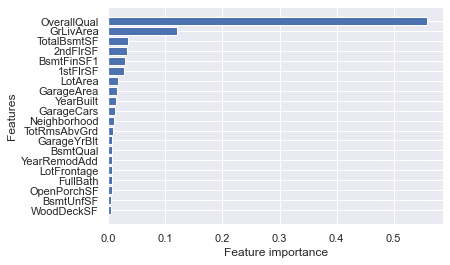

In [127]:
plot_features(X_train.columns, ideal_model.feature_importances_)